In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [4]:
chair = pd.read_excel('../chair.xlsx')
dummy = pd.read_excel('../chair_dummy.xlsx')

In [4]:
chair.head()

,링크,브랜드명,제품명,가격,별점,리뷰 갯수,헤드레스트 유무,팔걸이 유무,요추지지대 유무,높이 조절 레버 유무,틸팅 여부,등받이 곧/꺾,h8_지면-좌석 높이_MIN,h8_지면-좌석 높이_MAX,b3_좌석 가로 길이,t4_좌석 세로 길이 일반,b4_등받이 가로 길이,h7_등받이 세로 길이
0,https://ohou.se/productions/444838/selling?aff...,다니카,뮤즈 편한 팔걸이 컴퓨터 메쉬 사무용 책상 의자,47900,4.7,10692,X,O,X,O,X,꺾,410.0,NaN,NaN,NaN,NaN,500.0
1,https://ohou.se/productions/444869/selling?aff...,다니카,뮤즈 편한 팔걸이 헤드형 컴퓨터 메쉬 책상 의자,54900,4.7,4919,O,O,X,O,X,꺾,410.0,NaN,NaN,NaN,NaN,500.0
2,https://ohou.se/productions/1787558/selling?af...,네오체어,[무료배송]버디시리즈(CPS) 아마존 최다판매 학생용사무용 메쉬의자,46900,4.7,1720,X,O,O,O,O,꺾,430.0,520.0,480.0,500.0,430.0,470.0
3,https://ohou.se/productions/1787558/selling?af...,네오체어,[무료배송]버디시리즈(CPSH) 아마존 최다판매 학생용사무용 메쉬의자,51900,4.7,1720,O,O,O,O,O,꺾,430.0,520.0,480.0,500.0,430.0,470.0
4,https://ohou.se/productions/120974/selling?aff...,일루일루,미니 타이탄 기본형 게이밍 학생 컴퓨터 사무용 발받침 의자 3color,64900,4.6,4171,X,O,X,O,O,곧,450.0,530.0,520.0,460.0,480.0,670.0


In [5]:
dummy.head()

,링크,브랜드명,제품명,가격,별점,리뷰 갯수,헤드레스트 유무,팔걸이 유무,요추지지대 유무,높이 조절 레버 유무,틸팅 여부,등받이 곧/꺾,h8_지면-좌석 높이_MIN,h8_지면-좌석 높이_MAX,b3_좌석 가로 길이,t4_좌석 세로 길이 일반,b4_등받이 가로 길이,h7_등받이 세로 길이
0,dummy_1,dummy_1,dummy_1,1,1,10160,O,O,X,O,O,곧,410,570,490,540,440,730
1,dummy_2,dummy_2,dummy_2,2,2,10230,O,O,X,O,O,꺾,460,540,500,440,480,350
2,dummy_3,dummy_3,dummy_3,3,3,10345,O,O,X,O,O,꺾,460,540,520,400,480,540
3,dummy_4,dummy_4,dummy_4,4,4,8025,O,O,O,O,O,꺾,500,540,470,440,500,500
4,dummy_5,dummy_5,dummy_5,5,5,9980,X,O,X,O,O,곧,480,485,470,510,505,350


In [9]:
numerical_features = chair.select_dtypes(include=['float64', 'int32']).drop('별점', axis=1).columns
categorical_features = chair.select_dtypes(include=['object']).drop(['링크', '브랜드명', '제품명'], axis=1).columns

In [16]:
print()
display(chair[numerical_features].describe())
print()
display(dummy[numerical_features].describe())

,h8_지면-좌석 높이_MIN,h8_지면-좌석 높이_MAX,b3_좌석 가로 길이,t4_좌석 세로 길이 일반,b4_등받이 가로 길이,h7_등받이 세로 길이
count,91.000000,84.000000,87.000000,77.000000,70.000000,72.000000
mean,438.472527,507.928571,492.068966,490.883117,491.857143,526.472222
std,36.172224,40.281774,38.980852,48.765544,53.080274,123.033257
min,280.000000,380.000000,380.000000,400.000000,400.000000,250.000000
25%,425.000000,487.250000,470.000000,470.000000,460.000000,470.000000
50%,440.000000,510.000000,490.000000,480.000000,480.000000,510.000000
75%,457.500000,531.250000,505.000000,510.000000,505.000000,560.000000
max,520.000000,595.000000,655.000000,670.000000,650.000000,870.000000


,h8_지면-좌석 높이_MIN,h8_지면-좌석 높이_MAX,b3_좌석 가로 길이,t4_좌석 세로 길이 일반,b4_등받이 가로 길이,h7_등받이 세로 길이
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,438.434097,507.913093,492.073905,490.863793,491.964240,526.521216
std,36.011792,40.071382,38.774063,48.394827,52.817963,122.177240
min,280.000000,380.000000,380.000000,400.000000,400.000000,250.000000
25%,425.000000,488.000000,470.000000,470.000000,460.000000,470.000000
50%,440.000000,510.000000,490.000000,480.000000,480.000000,510.000000
75%,460.000000,535.000000,505.000000,510.000000,505.000000,560.000000
max,520.000000,595.000000,655.000000,670.000000,650.000000,870.000000


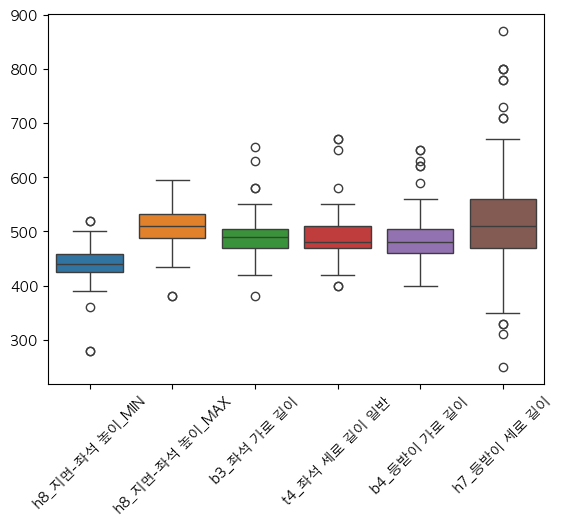

In [11]:
sns.boxplot(chair[numerical_features])
plt.xticks(rotation=45)
plt.show()

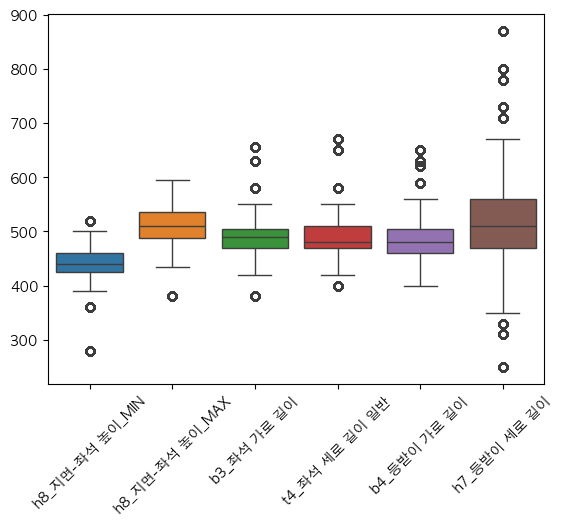

In [12]:
sns.boxplot(dummy[numerical_features])
plt.xticks(rotation=45)
plt.show()

In [32]:
dummy2 = dummy.drop_duplicates(keep='first')

In [33]:
dummy.shape, dummy2.shape

((1000000, 18), (1000000, 18))

In [133]:
ohouse = pd.read_excel('../ohouse_chair.xlsx')
ohouse.shape

(1793, 18)

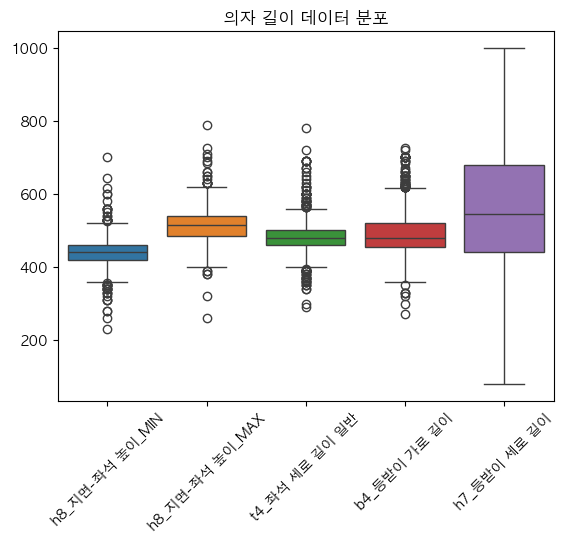

In [134]:
numerical_features = ohouse.select_dtypes(include=['float64', 'int32']).drop('별점', axis=1).columns

sns.boxplot(ohouse[numerical_features])
plt.title('의자 길이 데이터 분포')
plt.xticks(rotation=45)
plt.show()

In [135]:
ohouse.groupby('브랜드명').agg({'별점': 'mean', '리뷰 갯수': 'sum'}).sort_values(['별점', '리뷰 갯수'], ascending=[False, False]).iloc[:10]#.plot.bar(color='skyblue')
# plt.title('브랜드별 의자 수 Top 10')
# plt.xticks(rotation=45)
# plt.show()

,별점,리뷰 갯수
브랜드명,,
누카 NOOKA,5.0,146
락키홈즈,5.0,11
mu',5.0,10
예서안,5.0,10
늘나른,5.0,9
아임체어,5.0,6
피치,5.0,6
체어본,5.0,4
가즈다가구,5.0,3


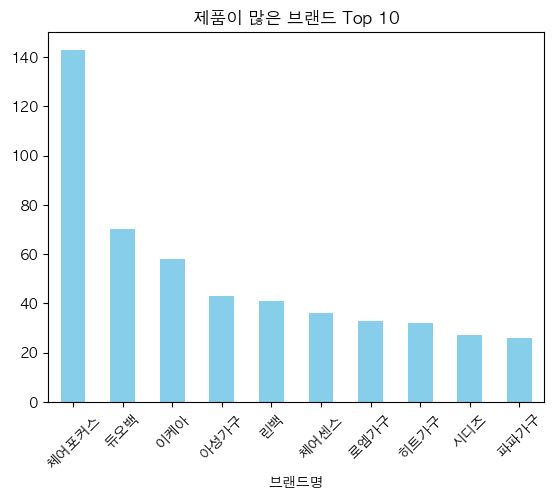

In [136]:
ohouse.브랜드명.value_counts().iloc[:10].plot.bar(color='skyblue')
plt.title('제품이 많은 브랜드 Top 10')
plt.xticks(rotation=45)
plt.show()

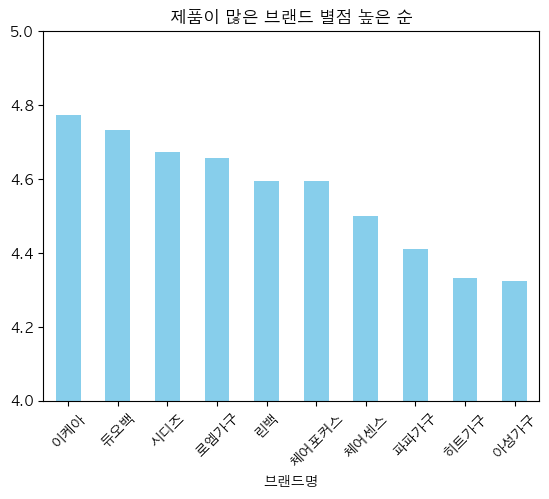

In [ ]:
ohouse.브랜드명.value_counts().iloc[:10].index
ohouse[ohouse.브랜드명.isin(ohouse.브랜드명.value_counts().iloc[:10].index)].groupby('브랜드명').별점.mean().sort_values(ascending=False).plot.bar(color='skyblue')
plt.title('제품이 많은 브랜드 별점 높은 순')
plt.xticks(rotation=45)
plt.ylim(4.0, 5.0)
plt.show()

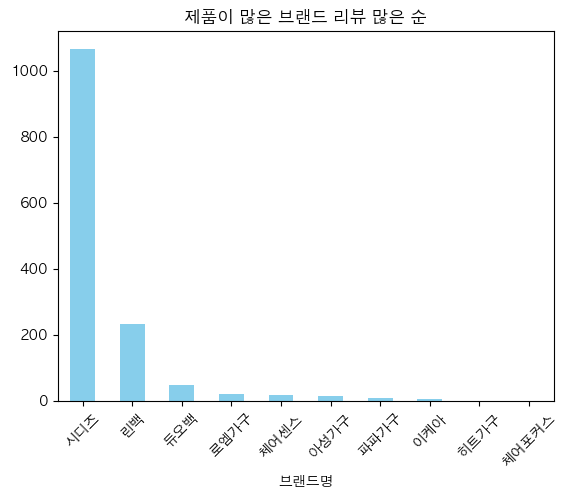

In [140]:
ohouse.브랜드명.value_counts().iloc[:10].index
ohouse[ohouse.브랜드명.isin(ohouse.브랜드명.value_counts().iloc[:10].index)].groupby('브랜드명')['리뷰 갯수'].mean().sort_values(ascending=False).plot.bar(color='skyblue')
plt.title('제품이 많은 브랜드 리뷰 많은 순')
plt.xticks(rotation=45)
# plt.ylim(4.5, 5.0)
plt.show()

In [141]:
ohouse.가격.value_counts()

가격
99000      44
129000     29
139000     28
159000     25
119000     23
           ..
188000      1
1518000     1
54000       1
61000       1
107900      1
Name: count, Length: 734, dtype: int64

In [142]:
bins = [0, 50000, 100000, 150000, 200000, 300000, 400000, 500000, float('inf')]
labels = ['5만원 이하', '5-10만원', '10-15만원', '15-20만원', '20-30만원', '30-40만원', '40-50만원', '50만원 이상']

ohouse['가격대'] = pd.cut(ohouse['가격'], bins=bins, labels=labels, right=False)

print("구간별 개수:")
print(ohouse['가격대'].value_counts().sort_index())

print("\n구간별 비율:")
print(ohouse['가격대'].value_counts(normalize=True).sort_index())

구간별 개수:
가격대
5만원 이하     169
5-10만원     605
10-15만원    395
15-20만원    180
20-30만원    209
30-40만원    138
40-50만원     39
50만원 이상     58
Name: count, dtype: int64

구간별 비율:
가격대
5만원 이하     0.094255
5-10만원     0.337423
10-15만원    0.220301
15-20만원    0.100390
20-30만원    0.116564
30-40만원    0.076966
40-50만원    0.021751
50만원 이상    0.032348
Name: proportion, dtype: float64


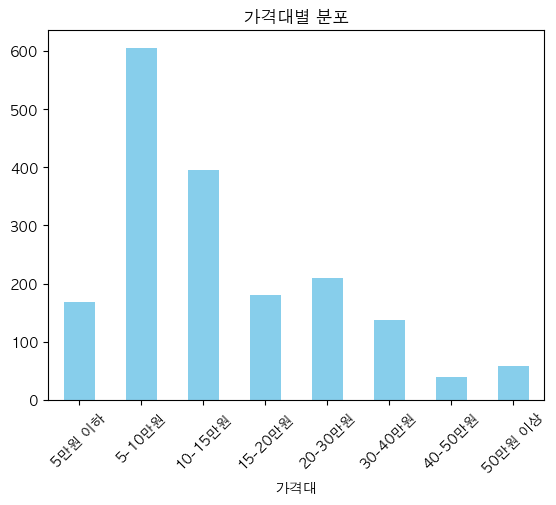

In [143]:
ohouse['가격대'].value_counts().sort_index().plot.bar(color='skyblue')
plt.title('가격대별 분포')
plt.xticks(rotation=45)
plt.show()

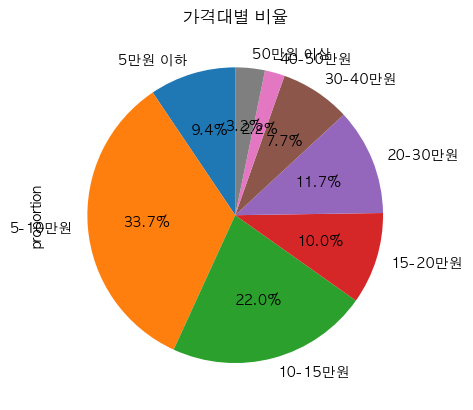

In [144]:
ohouse['가격대'].value_counts(normalize=True).sort_index().plot.pie(startangle=90, autopct='%.1f%%')
plt.title('가격대별 비율')
plt.show()

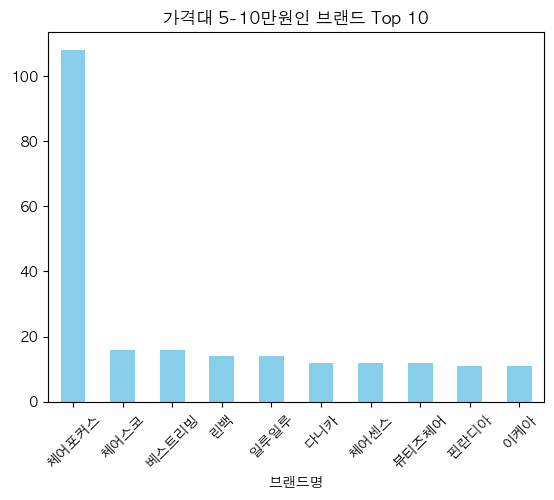

In [156]:
ohouse[ohouse['가격대'] == '5-10만원'].브랜드명.value_counts().iloc[:10].plot.bar(color='skyblue')
plt.title('가격대 5-10만원인 브랜드 Top 10')
plt.xticks(rotation=45)
plt.show()

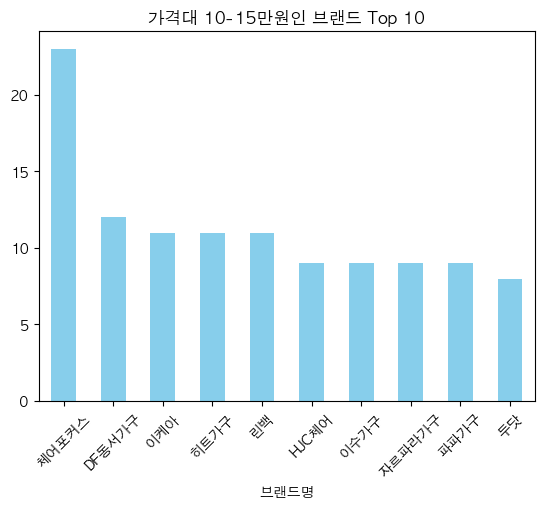

In [157]:
ohouse[ohouse['가격대'] == '10-15만원'].브랜드명.value_counts().iloc[:10].plot.bar(color='skyblue')
plt.title('가격대 10-15만원인 브랜드 Top 10')
plt.xticks(rotation=45)
plt.show()

In [92]:
categorical_features = ohouse[['헤드레스트 유무', '팔걸이 유무', '요추지지대 유무', '높이 조절 레버 유무', '틸팅 여부', '등받이 곧/꺾']].columns

In [150]:
ohouse[categorical_features].value_counts().iloc[:10]

헤드레스트 유무  팔걸이 유무  요추지지대 유무  높이 조절 레버 유무  틸팅 여부  등받이 곧/꺾
O         O       O         O            O      꺾          488
                  X         O            O      꺾          360
X         O       X         O            O      꺾          213
                                         X      꺾          112
                  O         O            O      꺾          104
                  X         X            X      꺾           89
          X       X         O            X      꺾           66
                            X            X      꺾           60
O         O       O         O            O      곧           50
                                         X      꺾           35
Name: count, dtype: int64

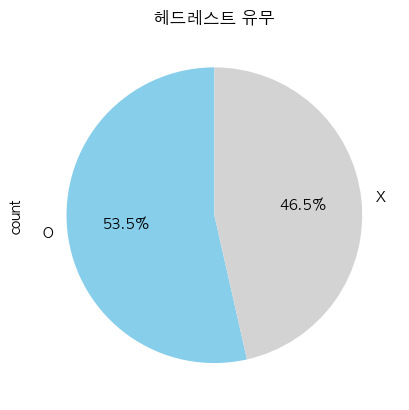

In [151]:
ohouse['헤드레스트 유무'].value_counts().plot.pie(startangle=90, autopct='%.1f%%', colors=['skyblue', 'lightgrey'])
plt.title('헤드레스트 유무')
plt.show()

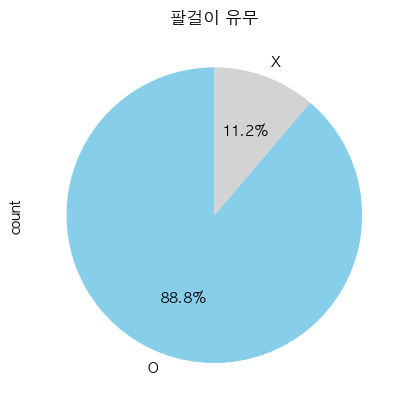

In [152]:
ohouse['팔걸이 유무'].value_counts().plot.pie(startangle=90, autopct='%.1f%%', colors=['skyblue', 'lightgrey'])
plt.title('팔걸이 유무')
plt.show()

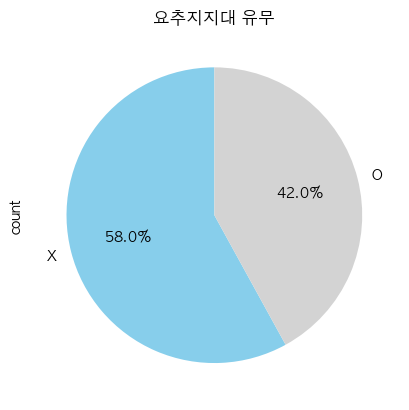

In [153]:
ohouse['요추지지대 유무'].value_counts().plot.pie(startangle=90, autopct='%.1f%%', colors=['skyblue', 'lightgrey'])
plt.title('요추지지대 유무')
plt.show()

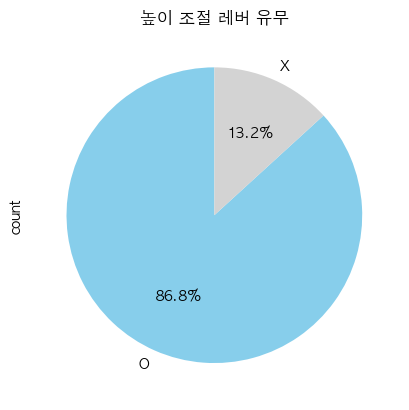

In [154]:
ohouse['높이 조절 레버 유무'].value_counts().plot.pie(startangle=90, autopct='%.1f%%', colors=['skyblue', 'lightgrey'])
plt.title('높이 조절 레버 유무')
plt.show()

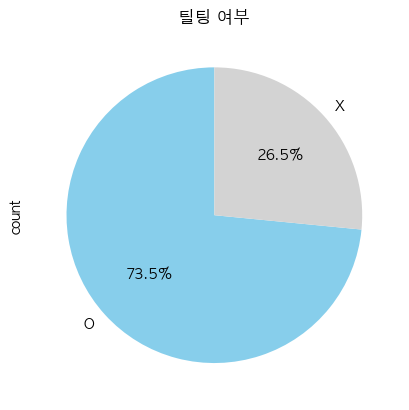

In [155]:
ohouse['틸팅 여부'].value_counts().plot.pie(startangle=90, autopct='%.1f%%', colors=['skyblue', 'lightgrey'])
plt.title('틸팅 여부')
plt.show()